In [1]:
import numpy as np
import pandas as pd
import altair as alt

alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [38]:
data = pd.read_csv('meteorite-landings.csv')

In [39]:
data.describe()

,id,mass,year,reclat,reclong
count,45716.000000,4.558500e+04,45428.000000,38401.000000,38401.000000
mean,26889.735104,1.327808e+04,1991.772189,-39.122580,61.074319
std,16860.683030,5.749889e+05,27.181247,46.378511,80.647298
min,1.000000,0.000000e+00,301.000000,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,1987.000000,-76.714240,0.000000
50%,24261.500000,3.260000e+01,1998.000000,-71.500000,35.666670
75%,40656.750000,2.026000e+02,2003.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2501.000000,81.166670,354.473330


In [71]:
clean = data[data['year'] >= 860]
clean = clean[clean['year'] <= 2016]
clean = clean[clean['reclat'] != 0]
clean = clean[clean['reclong'] != 0]
clean['year'] = clean['year'].astype(int)
clean = clean.dropna()

In [78]:
clean

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003,49.78917,41.50460,"(49.789170, 41.504600)"


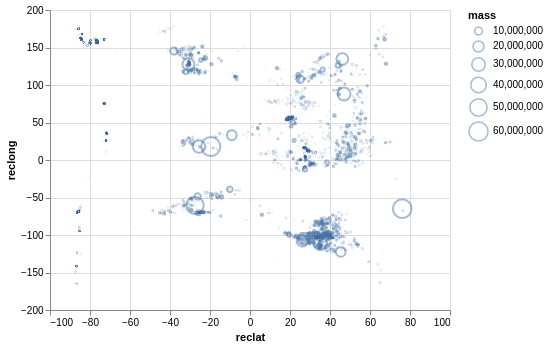

In [87]:
alt.Chart(clean).mark_point(opacity=0.5).encode(
    alt.X('reclat'),
    alt.Y('reclong'),
    size='mass'
)

In [88]:
clean['logmass'] = np.log(clean['mass'])

/home/waielonh/miniconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


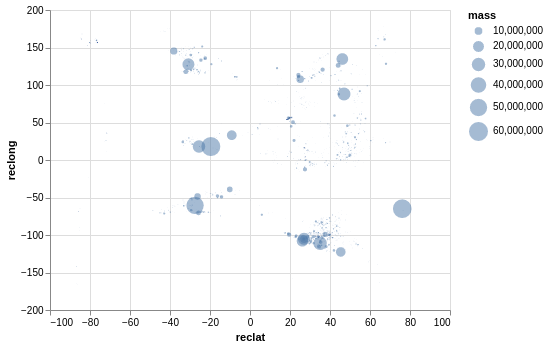

In [91]:
alt.Chart(clean).mark_circle(opacity=0.5).encode(
    alt.X('reclat'),
    alt.Y('reclong'),
    size='mass'
)

In [92]:
clean

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,logmass
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333,"(50.775000, 6.083330)",3.044522
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333,"(56.183330, 10.233330)",6.579251
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000,"(54.216670, -113.000000)",11.580584
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000,"(16.883330, -99.900000)",7.556951
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000,"(-33.166670, -64.950000)",6.659294
...,...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990,29.03700,17.01850,"(29.037000, 17.018500)",5.147494
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999,13.78333,8.96667,"(13.783330, 8.966670)",3.828641
45713,Zlin,30410,Valid,H4,3.3,Found,1939,49.25000,17.66667,"(49.250000, 17.666670)",1.193922
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003,49.78917,41.50460,"(49.789170, 41.504600)",7.681099


/home/waielonh/miniconda3/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


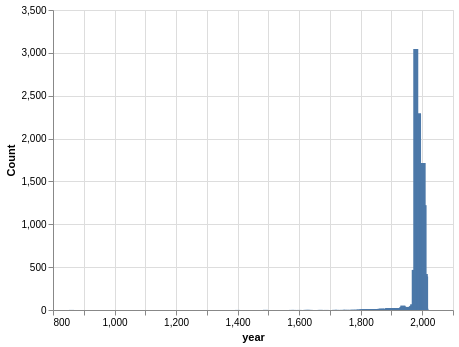

In [107]:
alt.Chart(clean.groupby(by='year').agg({'id': 'count'}).reset_index()).mark_bar().encode(
    alt.Y('id', title='Count'),
    alt.X('year')
)

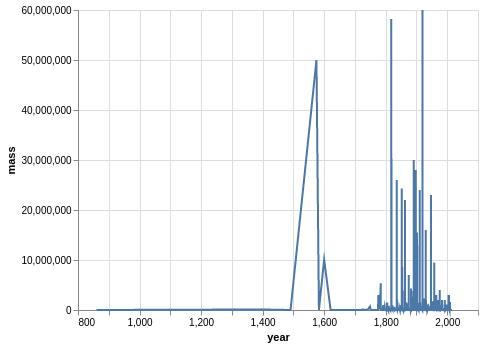

In [110]:
alt.Chart(clean).mark_line().encode(
    alt.X('year'),
    alt.Y('mass')
)

/home/waielonh/miniconda3/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


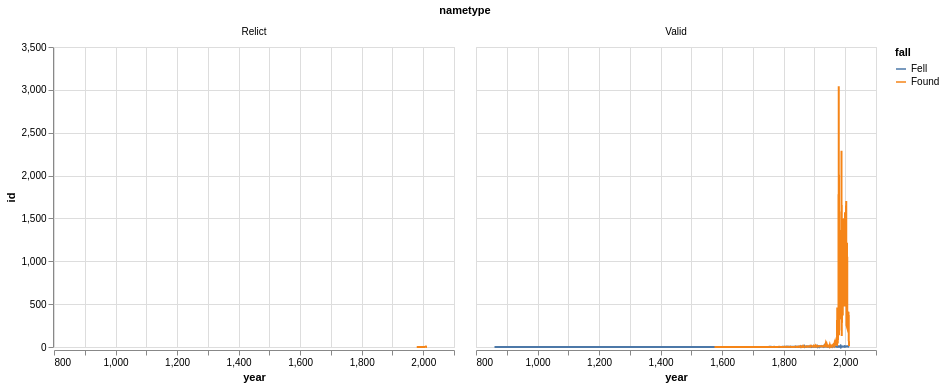

In [120]:
alt.Chart(clean.groupby(by=['year', 'fall', 'nametype']).agg({'id': 'count'}).reset_index()).mark_line().encode(
    alt.Y('id'),
    alt.X('year'),
    color='fall'
).facet('nametype')